Sales Prediction Using Python

Task 4 : Problem Statement

1) Sales prediction involves forcasting the amount of a product that customers will purchase, taking into account vairous factors such as advertising platform selection.

2) In bussiness that offer production or services, they utilize machine learning techniques in python to analyze and interpret data, allowing them to make informed decisions regarding advertising coasts. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Build a model according to requirements.

Importing important libraries :

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Reading the .csv data file :

In [65]:
Sp = pd.read_csv("Data/advertising.csv")
Sp

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Exploring data :

In [66]:
Sp.info()
Sp.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [67]:
Sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [68]:
Sp.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Plotting the relationship between the features and the target variable

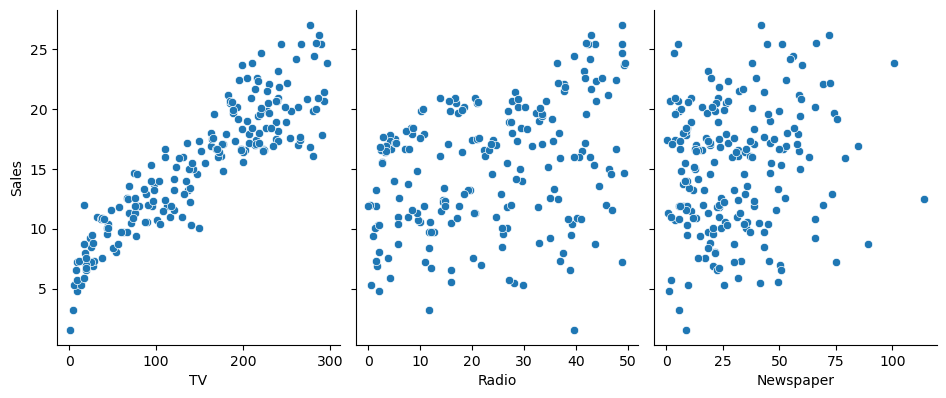

In [87]:
sns.pairplot(Sp, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8)
plt.show()

Separating our features and target columns for machine learning prediction :

In [70]:
X = Ir.drop(columns=['Sales'],axis=1)
Y = Ir['Sales']

In [71]:
print(X)

     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [72]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Splitting the data into training data and test data :

In [73]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [74]:
print(X.shape,X_train.shape,X_test.shape)

(200, 4) (160, 4) (40, 4)


Model training :

In [75]:
model=LinearRegression()

In [76]:
model.fit(X_train, Y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.please try loading this page with nbviewer.org.

In [77]:
print('intercept:=b0', model.intercept_)
print('slope:=b1 & b2', model.coef_)

intercept:=b0 3.166852762348922
slope:=b1 & b2 [-0.00092985  0.04734431  0.17301764  0.00437138]


In [78]:
X_train_prediction= model.predict(X_train)

In [79]:
print(X_train_prediction)

[21.25785177 17.15454902 21.18191516 14.92025109 19.83452263 18.66070732
 17.45570323  9.96771289  9.50850672 12.36158532 12.58809639 14.56398261
 17.49042644 17.08470353  8.35317544 16.77650343  8.86174946  3.93335358
  7.48590505 24.75612432 19.70803368 19.44177194 10.63319066 21.82761523
 18.33072879 10.30902953 18.82723297  6.28399048  3.86682386  9.12174493
 10.89879676 10.45891589 15.6985929  10.01761918 12.26855733  6.83951428
  4.6492216   9.69757128 14.44986064 18.95270244 23.21488717 23.36867373
 14.61832926 12.64680977 17.23887726 20.90241462 17.49768458 10.44326119
 24.33290454 15.73794436 18.51334321 10.15487222 15.21351882 19.38316507
 13.79238991 22.09041817 15.60618731 23.56822542 18.23118171 14.39642236
 15.01028303  6.88506208 19.39354201  8.45763547 21.58932845 10.42041116
 15.37105225 21.34091833 13.19177245 16.47320553  4.83913572 16.89030015
 14.58292213 12.99972575 17.51388839 11.99573046 13.48316474 10.31725464
  8.3267006  15.62682829 10.32901722 20.78333648 10

In [80]:
r2=model.score(X_train, Y_train)

In [81]:
print(r2*100)

91.52614531156523


In [82]:
Prediction_model=[[100,100,100,0]]

In [83]:
print('Sales of TV, Radio and Newspaper is:', model.predict(Prediction_model))

Sales of TV, Radio and Newspaper is: [25.11006256]
